In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\anupa\Documents\Python\Data Analysis Project\911.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [9]:
# Top 5 zipcodes for 911 calls
df['zip'].value_counts().nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
# Top 5 townships for 911 calls
df['twp'].value_counts().nlargest(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [15]:
# Unique titles in title column
df['title'].nunique()

110

In [17]:
# Seperating the reason from title column and creating a new column
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])

In [18]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


In [21]:
# Most common reasons for a 911 call
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

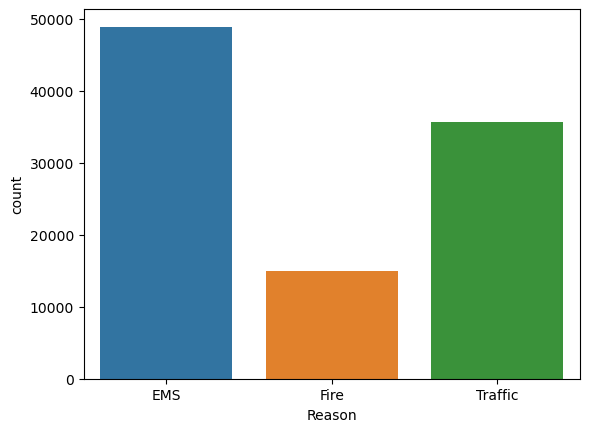

In [22]:
sns.countplot(data = df, x = 'Reason')

## Converting timeStamp column to DateTime object

In [24]:
from datetime import datetime

In [25]:
type(df['timeStamp'][0])

str

In [26]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [27]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [29]:
df['Hour'] = df['timeStamp'].dt.hour

In [31]:
df['Month'] = df['timeStamp'].dt.month

In [32]:
df['Day of Week'] = df['timeStamp'].dt.day_name()

In [34]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


## Data Visualization

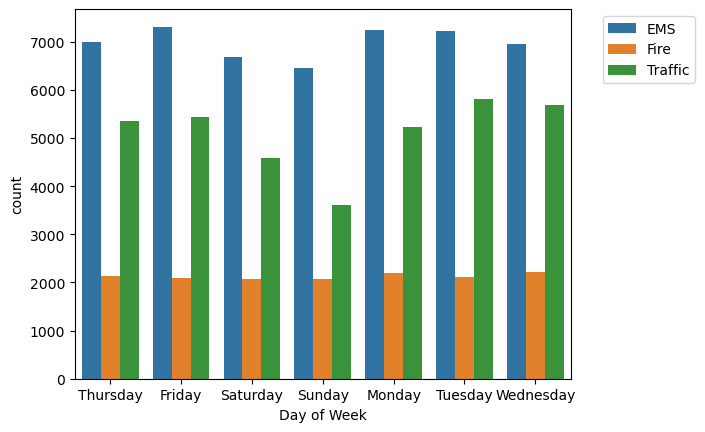

In [36]:
sns.countplot(data = df, x='Day of Week', hue = 'Reason')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

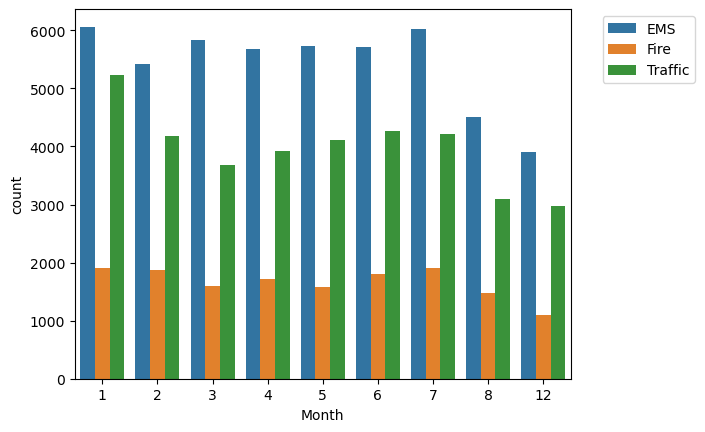

In [37]:
sns.countplot(data = df, x='Month', hue = 'Reason')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

## Cleaning the Data

In [56]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 9.9+ MB


In [63]:
df[df['zip'].isnull()]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,17,12,Thursday
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1,Traffic,17,12,Thursday
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:02:02,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1,Traffic,18,12,Thursday
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:02:02,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1,Traffic,18,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99459,40.233713,-75.463603,HIGHLAND MANOR DR & DEAD END; PERKIOMEN; Stat...,NaN,EMS: FALL VICTIM,2016-08-24 09:27:01,PERKIOMEN,HIGHLAND MANOR DR & DEAD END,1,EMS,9,8,Wednesday
99479,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: CARDIAC EMERGENCY,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1,EMS,10,8,Wednesday
99480,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: DIABETIC EMERGENCY,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1,EMS,10,8,Wednesday
99481,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: DIZZINESS,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1,EMS,10,8,Wednesday


In [65]:
# filling NaN in numerical columns with mean of the column
df['zip'] = df['zip'].fillna(df['zip'].mean())

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          99492 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 9.9+ MB


In [69]:
df1 = df.dropna()

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98942 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          98942 non-null  float64       
 1   lng          98942 non-null  float64       
 2   desc         98942 non-null  object        
 3   zip          98942 non-null  float64       
 4   title        98942 non-null  object        
 5   timeStamp    98942 non-null  datetime64[ns]
 6   twp          98942 non-null  object        
 7   addr         98942 non-null  object        
 8   e            98942 non-null  int64         
 9   Reason       98942 non-null  object        
 10  Hour         98942 non-null  int64         
 11  Month        98942 non-null  int64         
 12  Day of Week  98942 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 10.6+ MB


In [81]:
# column e is a dummy variable which is always 1, hence can be dropped
df = df.drop('e', axis=1)

In [82]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.000000,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.000000,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.000000,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.000000,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19237.658298,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thursday


## Visualization using Heat Maps and Cluster Maps

In [83]:
pivot_df = df.pivot_table(index='Day of Week', columns='Month', aggfunc='size', fill_value=0)

In [84]:
pivot_df

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


<Axes: xlabel='Month', ylabel='Day of Week'>

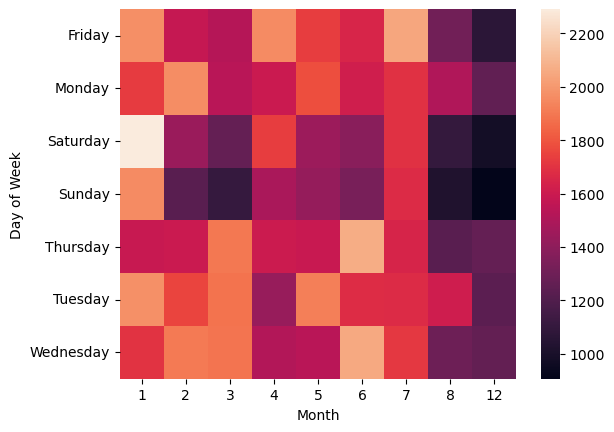

In [85]:
sns.heatmap(pivot_df)

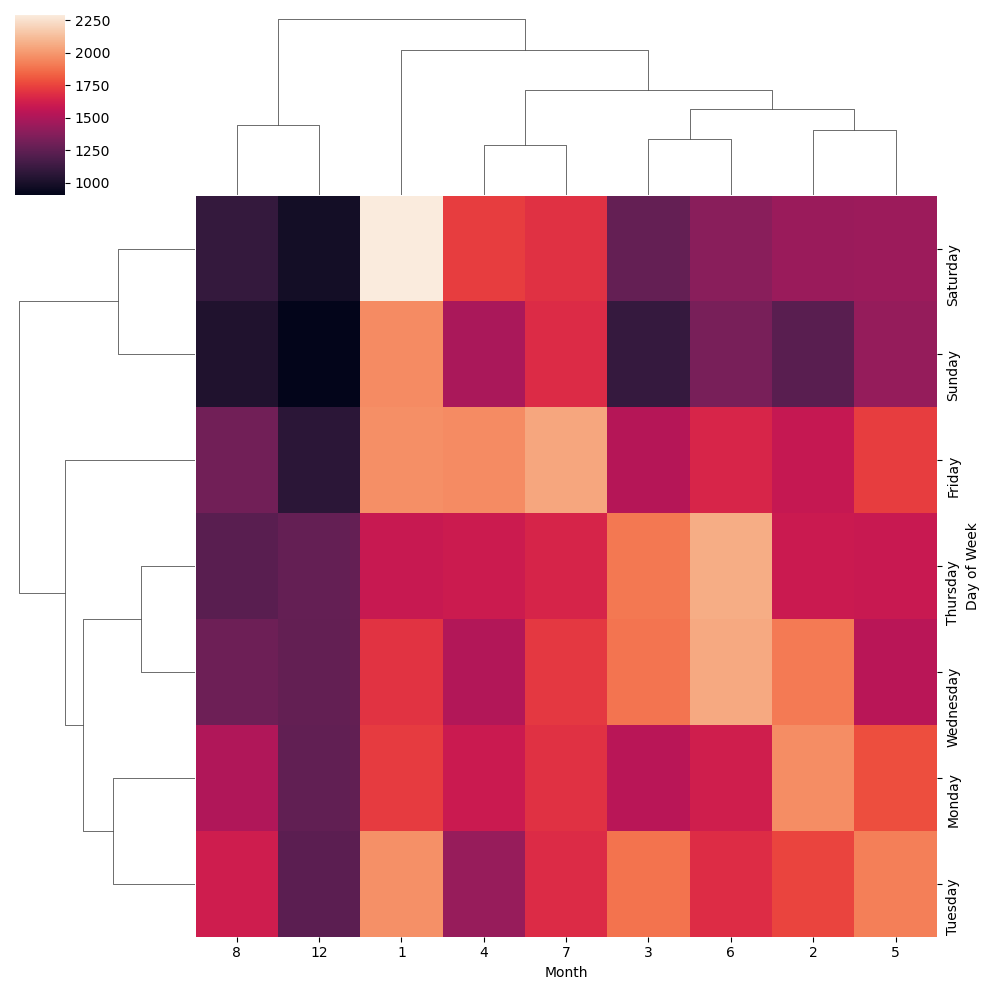

In [86]:
sns.clustermap(pivot_df)